# BDA Mini project 

### Dataset : National Family Health Survey

### Source : https://github.com/pratapvardhan/NFHS-5.git

In [1]:
from pyspark.sql import SparkSession

spark = SparkSession.builder \
    .appName("MyApp") \
    .getOrCreate()

sc = spark.sparkContext
sc

<SparkContext master=local[*] appName=MyApp>

#  Dataset Insights

### 1. Structure and Coverage:
The dataset contains 111 rows and 136 columns, covering 37 States/UTs with entries for Urban, Rural, and Total areas. It includes indicators on demographics, education, health, and lifestyle. There are no missing values, ensuring high data quality.

### 2. Geographic and Area Distribution
Each State/UT has three area records — Urban, Rural, and Total. This enables comparison between regions and lifestyles. Urban areas generally perform better in education, health access, and digital inclusion.

### 3. Demographic Highlights
- Sex ratio ranges from 929 to 1,037 females per 1,000 males.
- Population below 15 years averages around 26%.
- Birth registration exceeds 85% in most states, reflecting administrative progress.

### 4. Education and Empowerment
- Female education (age 6+) averages 72%, reaching 90%+ in Kerala and Delhi.
- Women with bank accounts: ~80%, showing strong financial inclusion.
- Mobile phone ownership (women): 45–70%, higher in urban regions.

### 5. Health and Violence
- Spousal violence: Around 20–35% of ever-married women report incidents.
- Violence during pregnancy: Around 3% nationally.
- Sexual violence by age 18: ~1–2%.
These indicate ongoing challenges in women’s safety and social awareness.

### 6. Lifestyle Patterns
Tobacco use: Women (5–15%), Men (30–45%).
Alcohol consumption: Women (<2%), Men (~18–20%).
Higher usage in some rural and northeastern regions shows cultural influence.

### 7. Key Insights
Urban areas outperform rural ones in education and digital inclusion.
Higher education links to lower violence rates.
States with more women’s education show stronger empowerment indicators.
Lifestyle risks (tobacco, alcohol) remain gender- and region-specific.



In [19]:
import pandas as pd
import numpy as np

df = pd.read_csv(r"C:\Users\harsh\Desktop\NFHS_5_Factsheets_Data.csv")
df

,States/UTs,Area,Number of Households surveyed,Number of Women age 15-49 years interviewed,Number of Men age 15-54 years interviewed,Female population age 6 years and above who ever attended school (%),Population below age 15 years (%),"Sex ratio of the total population (females per 1,000 males)","Sex ratio at birth for children born in the last five years (females per 1,000 males)",Children under age 5 years whose birth was registered with the civil authority (%),...,Women (age 15-49 years) having a bank or savings account that they themselves use (%),Women (age 15-49 years) having a mobile phone that they themselves use (%),Women age 15-24 years who use hygienic methods of protection during their menstrual period26 (%),Ever-married women age 18-49 years who have ever experienced spousal violence27 (%),Ever-married women age 18-49 years who have experienced physical violence during any pregnancy (%),Young women age 18-29 years who experienced sexual violence by age 18 (%),Women age 15 years and above who use any kind of tobacco (%),Men age 15 years and above who use any kind of tobacco (%),Women age 15 years and above who consume alcohol (%),Men age 15 years and above who consume alcohol (%)
0,India,Urban,160138,179535,26420,82.5,23.1,985.0,924,93.3,...,80.9,69.4,89.4,24.2,2.5,1.1,5.4,28.8,0.6,16.5
1,India,Rural,476561,544580,75419,66.8,28.1,1037.0,931,87.5,...,77.4,46.6,72.3,31.6,3.4,1.6,10.5,42.7,1.6,19.9
2,India,Total,636699,724115,101839,71.8,26.5,1020.0,929,89.1,...,78.6,54.0,77.3,29.3,3.1,1.5,8.9,38.0,1.3,18.8
3,Andaman & Nicobar Islands,Urban,527,557,85,86.5,22.7,1023.0,941,96.9,...,88.5,80.8,98.5,23.2,(0.0),1.4,15.0,44.7,0.7,33.8
4,Andaman & Nicobar Islands,Rural,2097,1840,282,81.8,19.7,929.0,891,97.8,...,89.8,80.9,99.1,13.2,0.5,2.2,41.1,66.4,7.6,41.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,Uttarakhand,Rural,9811,10694,1270,72.0,27.1,1052.0,937,91.8,...,79.8,55.7,89.7,16.2,2.0,0.4,5.4,36.8,0.4,27.5
107,Uttarakhand,Total,12169,13280,1586,75.2,26.3,1016.0,984,91.9,...,80.2,60.9,91.2,15.1,2.1,0.3,4.6,33.7,0.3,25.5
108,West Bengal,Urban,5442,6358,942,84.1,20.2,1016.0,921,98.1,...,82.9,71.9,91.2,22.9,2.3,6.7,8.0,44.7,0.8,18.9
109,West Bengal,Rural,12745,15050,2079,73.3,25.1,1065.0,993,98.3,...,73.2,39.1,79.7,28.7,4.0,10.9,12.3,49.9,1.3,17.7


In [25]:
# Full column renaming dictionary
rename_dict = {
    "States/UTs": "State",
    "Area": "Area",
    "Number of Households surveyed": "Households_Surveyed",
    "Number of Women age 15-49 years interviewed": "Women_15_49_Interviewed",
    "Number of Men age 15-54 years interviewed": "Men_15_54_Interviewed",
    "Female population age 6 years and above who ever attended school (%)": "Female_Literacy",
    "Population below age 15 years (%)": "Population_U15",
    "Sex ratio of the total population (females per 1,000 males)": "Sex_Ratio_Total",
    "Sex ratio at birth for children born in the last five years (females per 1,000 males)": "Sex_Ratio_Birth",
    "Children under age 5 years whose birth was registered with the civil authority (%)": "Birth_Registered",
    "Women (age 15-49 years) having a bank or savings account that they themselves use (%)": "Bank_Account",
    "Women (age 15-49 years) having a mobile phone that they themselves use (%)": "Mobile",
    "Women age 15-24 years who use hygienic methods of protection during their menstrual period26 (%)": "Menstrual_Hygiene",
    "Ever-married women age 18-49 years who have ever experienced spousal violence27 (%)": "Spousal_Violence",
    "Ever-married women age 18-49 years who have experienced physical violence during any pregnancy (%)": "Pregnancy_Violence",
    "Young women age 18-29 years who experienced sexual violence by age 18 (%)": "Sexual_Violence",
    "Women age 15 years and above who use any kind of tobacco (%)": "Women_Tobacco",
    "Men age 15 years and above who use any kind of tobacco (%)": "Men_Tobacco",
    "Women age 15 years and above who consume alcohol (%)": "Women_Alcohol",
    "Men age 15 years and above who consume alcohol (%)": "Men_Alcohol"
}

# Apply renaming
df.rename(columns=rename_dict, inplace=True)

# Check renamed columns
print(df.columns)

Index(['State', 'Area', 'Households_Surveyed', 'Women_15_49_Interviewed',
       'Men_15_54_Interviewed', 'Female_Literacy', 'Population_U15',
       'Sex_Ratio_Total', 'Sex_Ratio_Birth', 'Birth_Registered',
       ...
       'Bank_Account', 'Mobile', 'Menstrual_Hygiene', 'Spousal_Violence',
       'Pregnancy_Violence', 'Sexual_Violence', 'Women_Tobacco', 'Men_Tobacco',
       'Women_Alcohol', 'Men_Alcohol'],
      dtype='object', length=136)


In [27]:
df

,State,Area,Households_Surveyed,Women_15_49_Interviewed,Men_15_54_Interviewed,Female_Literacy,Population_U15,Sex_Ratio_Total,Sex_Ratio_Birth,Birth_Registered,...,Bank_Account,Mobile,Menstrual_Hygiene,Spousal_Violence,Pregnancy_Violence,Sexual_Violence,Women_Tobacco,Men_Tobacco,Women_Alcohol,Men_Alcohol
0,India,Urban,160138,179535,26420,82.5,23.1,985.0,924,93.3,...,80.9,69.4,89.4,24.2,2.5,1.1,5.4,28.8,0.6,16.5
1,India,Rural,476561,544580,75419,66.8,28.1,1037.0,931,87.5,...,77.4,46.6,72.3,31.6,3.4,1.6,10.5,42.7,1.6,19.9
2,India,Total,636699,724115,101839,71.8,26.5,1020.0,929,89.1,...,78.6,54.0,77.3,29.3,3.1,1.5,8.9,38.0,1.3,18.8
3,Andaman & Nicobar Islands,Urban,527,557,85,86.5,22.7,1023.0,941,96.9,...,88.5,80.8,98.5,23.2,(0.0),1.4,15.0,44.7,0.7,33.8
4,Andaman & Nicobar Islands,Rural,2097,1840,282,81.8,19.7,929.0,891,97.8,...,89.8,80.9,99.1,13.2,0.5,2.2,41.1,66.4,7.6,41.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,Uttarakhand,Rural,9811,10694,1270,72.0,27.1,1052.0,937,91.8,...,79.8,55.7,89.7,16.2,2.0,0.4,5.4,36.8,0.4,27.5
107,Uttarakhand,Total,12169,13280,1586,75.2,26.3,1016.0,984,91.9,...,80.2,60.9,91.2,15.1,2.1,0.3,4.6,33.7,0.3,25.5
108,West Bengal,Urban,5442,6358,942,84.1,20.2,1016.0,921,98.1,...,82.9,71.9,91.2,22.9,2.3,6.7,8.0,44.7,0.8,18.9
109,West Bengal,Rural,12745,15050,2079,73.3,25.1,1065.0,993,98.3,...,73.2,39.1,79.7,28.7,4.0,10.9,12.3,49.9,1.3,17.7


import matplotlib.pyplot as plt

#1: Population below Age 15 Distribution


plt.figure(figsize=(8,5))
plt.hist(pop_under15['Population below age 15 years (%)'], bins=15, color="skyblue", edgecolor="black")
plt.title("Population Below Age 15 (%) Distribution")
plt.xlabel("Population below 15 (%)")
plt.ylabel("Count")
plt.show()

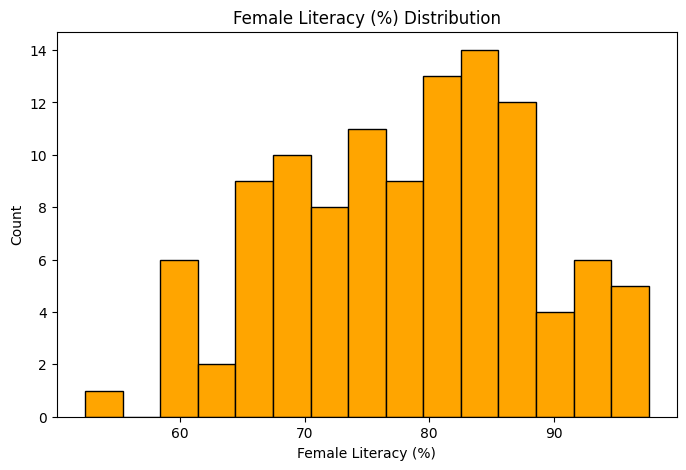

In [51]:
#2: Female Literacy Distribution
# Female Literacy Distribution
plt.figure(figsize=(8,5))
plt.hist(df['Female_Literacy'], bins=15, color="orange", edgecolor="black")
plt.title("Female Literacy (%) Distribution")
plt.xlabel("Female Literacy (%)")
plt.ylabel("Count")
plt.show()



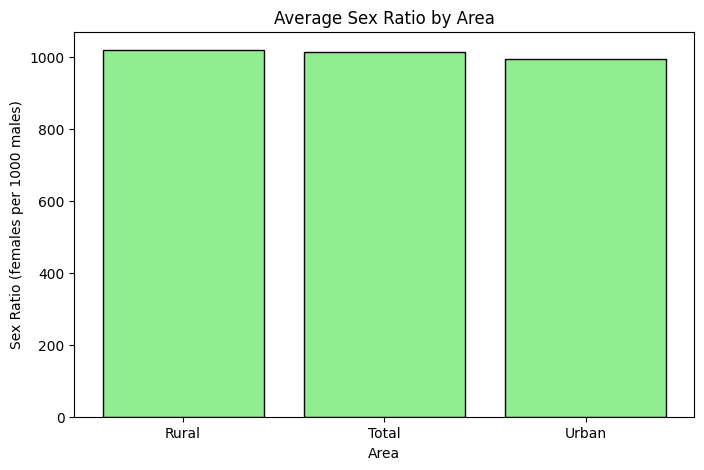

In [54]:
#3: Sex Ratio Distribution

# Group by Area and calculate mean sex ratio
sex_ratio_grouped = sex_ratio.groupby('Area')['Sex_Ratio_Total'].mean().reset_index()

# Plot bar chart
plt.figure(figsize=(8,5))
plt.bar(sex_ratio_grouped['Area'], sex_ratio_grouped['Sex_Ratio_Total'], color="lightgreen", edgecolor="black")
plt.title("Average Sex Ratio by Area")
plt.xlabel("Area")
plt.ylabel("Sex Ratio (females per 1000 males)")
plt.show()


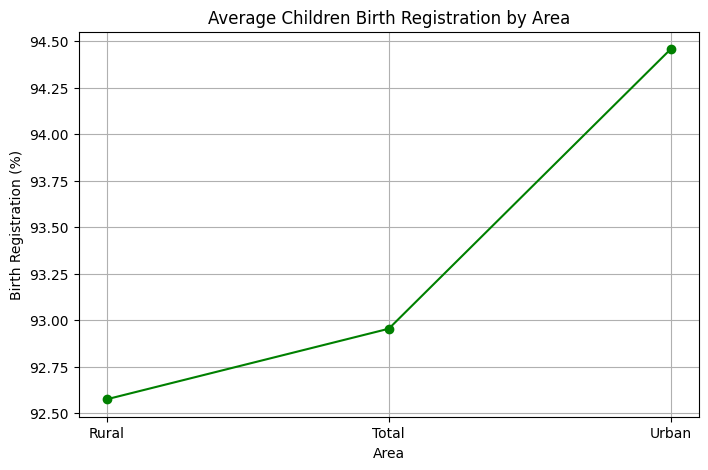

In [58]:
# Step 1: Strip spaces and rename column
df.columns = df.columns.str.strip()
df.rename(columns={'Children under age 5 years whose birth was registered with the civil authority (%)': 'Birth_Registered'}, inplace=True)

# Step 2: Group by Area and calculate mean birth registration
birth_reg_area = df.groupby('Area')['Birth_Registered'].mean().reset_index()

# Step 3: Plot line graph
plt.figure(figsize=(8,5))
plt.plot(birth_reg_area['Area'], birth_reg_area['Birth_Registered'], marker='o', color='green')
plt.title("Average Children Birth Registration by Area")
plt.xlabel("Area")
plt.ylabel("Birth Registration (%)")
plt.grid(True)
plt.show()


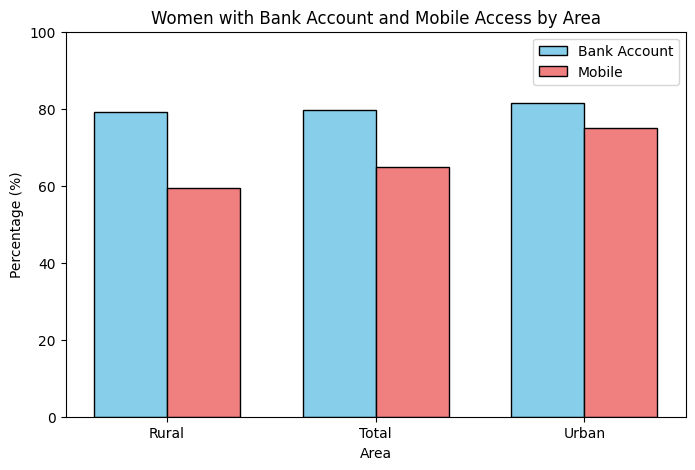

In [38]:
df.rename(columns={
    'Women (age 15-49 years) having a bank or savings account that they themselves use (%)': 'Bank_Account',
    'Women (age 15-49 years) having a mobile phone that they themselves use (%)': 'Mobile'
}, inplace=True)

# Clean columns: extract numeric values
for col in ['Bank_Account', 'Mobile']:
    df[col] = df[col].astype(str).str.extract(r'(\d+\.?\d*)')[0]
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Drop rows with NaN in these columns
df_clean = df.dropna(subset=['Bank_Account', 'Mobile'])

# Group by Area and calculate mean
mobile_bank_grouped = df_clean.groupby('Area')[['Bank_Account', 'Mobile']].mean().reset_index()

# Plot grouped bar chart
areas = mobile_bank_grouped['Area']
x = np.arange(len(areas))
width = 0.35

plt.figure(figsize=(8,5))
plt.bar(x - width/2, mobile_bank_grouped['Bank_Account'], width, label='Bank Account', color='skyblue', edgecolor='black')
plt.bar(x + width/2, mobile_bank_grouped['Mobile'], width, label='Mobile', color='lightcoral', edgecolor='black')

plt.xticks(x, areas)
plt.xlabel("Area")
plt.ylabel("Percentage (%)")
plt.title("Women with Bank Account and Mobile Access by Area")
plt.ylim(0, 100)
plt.legend()
plt.show()

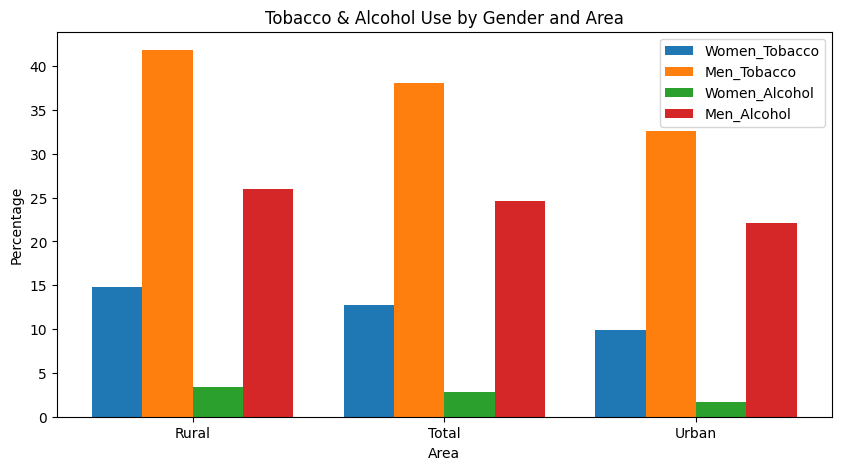

In [65]:
# Convert to numeric (just in case)
cols = ['Women_Tobacco', 'Men_Tobacco', 'Women_Alcohol', 'Men_Alcohol']
df[cols] = df[cols].apply(pd.to_numeric, errors='coerce')

# Group by Area
grouped = df.groupby('Area')[cols].mean().reset_index()

# Plot side-by-side bars
x = range(len(grouped))
width = 0.2

plt.figure(figsize=(10,5))
for i, col in enumerate(cols):
    plt.bar([xi + i*width for xi in x], grouped[col], width=width, label=col)

plt.xticks([xi + 1.5*width for xi in x], grouped['Area'])
plt.xlabel("Area")
plt.ylabel("Percentage")
plt.title("Tobacco & Alcohol Use by Gender and Area")
plt.legend()
plt.show()

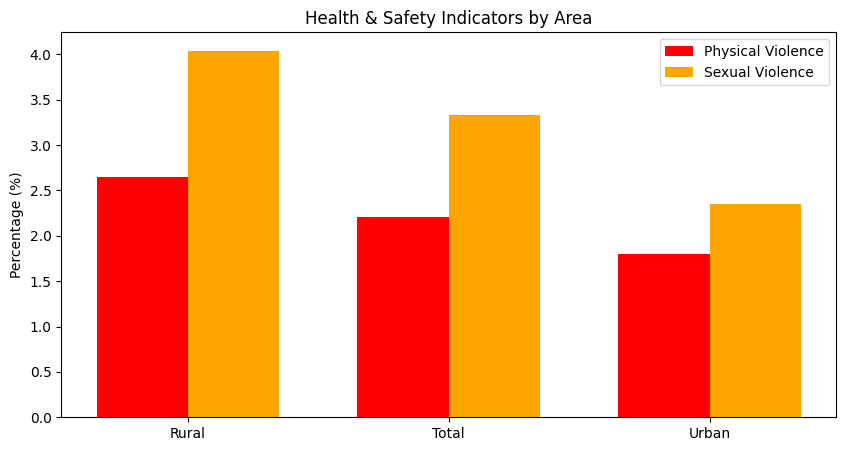

In [67]:

#12
# Convert columns to numeric directly on the main DataFrame
df[['Pregnancy_Violence', 'Sexual_Violence']] = df[['Pregnancy_Violence', 'Sexual_Violence']].apply(pd.to_numeric, errors='coerce')

# Group by Area and calculate mean
grouped = df.groupby('Area')[['Pregnancy_Violence', 'Sexual_Violence']].mean().reset_index()

# Plot side-by-side bar chart
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
width = 0.35
x = range(len(grouped))
plt.bar([i - width/2 for i in x], grouped['Pregnancy_Violence'], width=width, label='Physical Violence', color='red')
plt.bar([i + width/2 for i in x], grouped['Sexual_Violence'], width=width, label='Sexual Violence', color='orange')

plt.xticks(x, grouped['Area'])
plt.ylabel('Percentage (%)')
plt.title('Health & Safety Indicators by Area')
plt.legend()
plt.show()

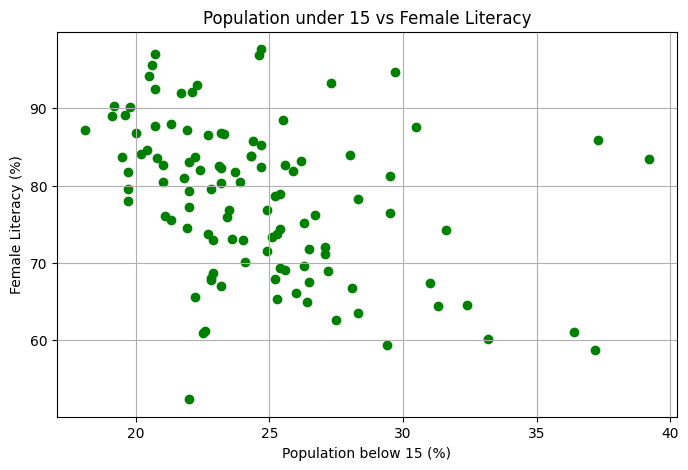

In [64]:
#13

# Convert relevant columns to numeric
df[['Female_Literacy','Mobile','Population_U15']] = df[['Female_Literacy','Mobile','Population_U15']].apply(pd.to_numeric, errors='coerce')



# Scatter Plot 2: Population under 15 vs Female Literacy
plt.figure(figsize=(8,5))
plt.scatter(df['Population_U15'], df['Female_Literacy'], color='green')
plt.xlabel('Population below 15 (%)')
plt.ylabel('Female Literacy (%)')
plt.title('Population under 15 vs Female Literacy')
plt.grid(True)
plt.show()

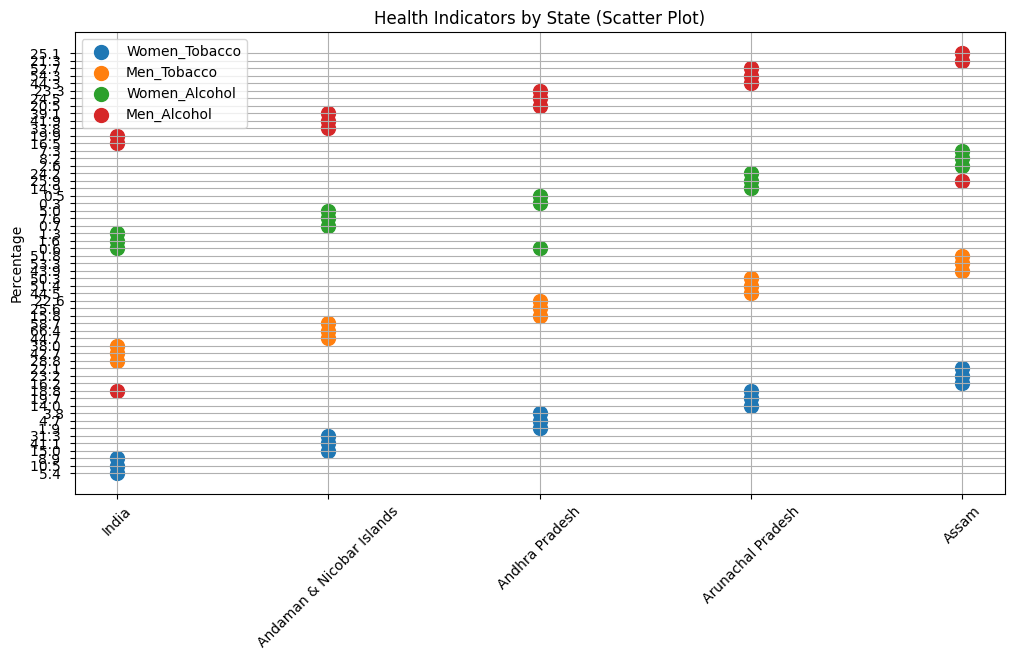

In [69]:
#15
plt.figure(figsize=(12,6))

# Plot each indicator as scatter points
for col in health:
    plt.scatter(df_subset['State'], df_subset[col], s=100, label=col)  # s=marker size

plt.xticks(rotation=45)
plt.ylabel('Percentage')
plt.title('Health Indicators by State (Scatter Plot)')
plt.legend()
plt.grid(True)
plt.show()

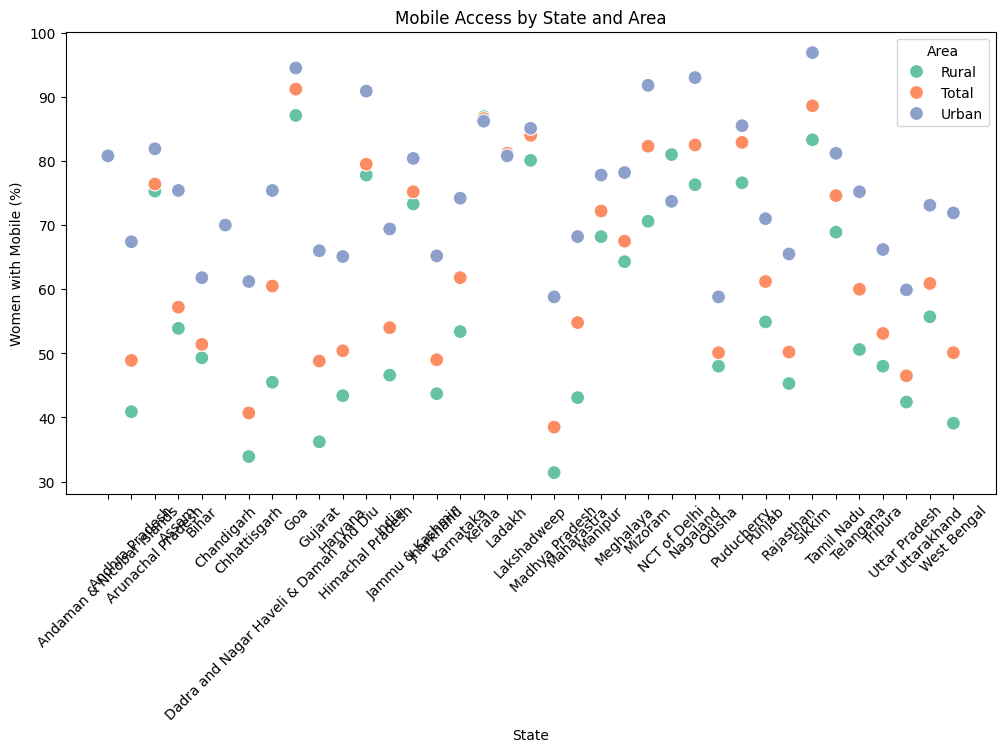

In [70]:
#14
# Prepare data: melt the pivot table into long format
scatter_data = heatmap_data['Mobile'].reset_index().melt(id_vars='State', 
                                                        var_name='Area', 
                                                        value_name='Mobile_Access')

# Plot scatter plot
plt.figure(figsize=(12,6))
sns.scatterplot(data=scatter_data, x='State', y='Mobile_Access', hue='Area', s=100, palette='Set2')
plt.xticks(rotation=45)
plt.ylabel('Women with Mobile (%)')
plt.title('Mobile Access by State and Area')
plt.legend(title='Area')
plt.show()

In [74]:
print("Total number of records:", df.count())


Total number of records: 111


In [78]:
print("Total states/UTs:", df.select("States/UTs").distinct().count())


Total states/UTs: 37


In [79]:
print("Total rows:", df.count())


Total rows: 111


In [82]:
df.groupBy("Area").count().show()


+-----+-----+
| Area|count|
+-----+-----+
|Total|   37|
|Urban|   37|
|Rural|   37|
+-----+-----+



In [91]:
print("Total number of areas:", df.select("Area").distinct().count())

Total number of areas: 3


In [94]:
# Rename the column 'States/UTs' → 'State' for convenience
df = df.withColumnRenamed("States/UTs", "State")

# -----------------------------
# 4. Total number of states
# -----------------------------
print("Total number of states:", df.select("State").distinct().count())

# -----------------------------
# 5. State names
# -----------------------------
print("List of states:")
df.select("State").distinct().show(50, truncate=False)


Total number of states: 37
List of states:
+--------------------------------------+
|State                                 |
+--------------------------------------+
|Nagaland                              |
|Karnataka                             |
|Odisha                                |
|Kerala                                |
|Ladakh                                |
|Tamil Nadu                            |
|Chhattisgarh                          |
|Andhra Pradesh                        |
|Lakshadweep                           |
|Madhya Pradesh                        |
|Punjab                                |
|Manipur                               |
|Jammu & Kashmir                       |
|India                                 |
|Goa                                   |
|Mizoram                               |
|Himachal Pradesh                      |
|Puducherry                            |
|Haryana                               |
|Jharkhand                             |
|Arunachal Pra

In [95]:
from pyspark.sql.functions import min, max, col

# -----------------------------
# 7. Min and Max Female Literacy by Area
# -----------------------------
literacy_stats = (
    df.groupBy("Area")
      .agg(
          min(col("Female_Literacy")).alias("Min_Female_Literacy"),
          max(col("Female_Literacy")).alias("Max_Female_Literacy")
      )
      .orderBy(col("Max_Female_Literacy").desc())
)

print("Minimum and Maximum Female Literacy by Area:")
literacy_stats.show()


Minimum and Maximum Female Literacy by Area:
+-----+-------------------+-------------------+
| Area|Min_Female_Literacy|Max_Female_Literacy|
+-----+-------------------+-------------------+
|Urban|              68.7 |              97.6 |
|Rural|             (69.2)|              96.9 |
|Total|              60.9 |              95.5 |
+-----+-------------------+-------------------+



In [98]:
from pyspark.sql.functions import min, max
df.select(min("Population_U15").alias("Min_Pop_U15"),
          max("Population_U15").alias("Max_Pop_U15")).show()


+-----------+-----------+
|Min_Pop_U15|Max_Pop_U15|
+-----------+-----------+
|       18.1|       39.2|
+-----------+-----------+



In [100]:
from pyspark.sql.functions import regexp_replace, col, avg, round

# Clean column: remove parentheses and spaces, then cast to double
df = df.withColumn("Female_Literacy_Clean",
                   regexp_replace(col("Female_Literacy"), "[()]", "").cast("double"))

# Compute average
df.select(round(avg("Female_Literacy_Clean"), 2).alias("Avg_Female_Literacy")).show()


+-------------------+
|Avg_Female_Literacy|
+-------------------+
|              78.08|
+-------------------+



In [102]:
from pyspark.sql.functions import when, col

# -----------------------------
# 9. Increase Female Literacy by 5% for Urban Areas
# -----------------------------

# Convert to numeric safely if not already
df = df.withColumn("Female_Literacy_Clean", col("Female_Literacy").cast("double"))

# Update literacy value for Urban areas
df_updated = df.withColumn(
    "Female_Literacy_Updated",
    when(col("Area") == "Urban", col("Female_Literacy_Clean") + 5)
    .otherwise(col("Female_Literacy_Clean"))
)

# Show original vs updated values for verification
print("Female Literacy before and after (showing first 10 rows):")
df_updated.select("State", "Area", "Female_Literacy_Clean", "Female_Literacy_Updated").show(10)


Female Literacy before and after (showing first 10 rows):
+--------------------+-----+---------------------+-----------------------+
|               State| Area|Female_Literacy_Clean|Female_Literacy_Updated|
+--------------------+-----+---------------------+-----------------------+
|               India|Urban|                 82.5|                   87.5|
|               India|Rural|                 66.8|                   66.8|
|               India|Total|                 71.8|                   71.8|
|Andaman & Nicobar...|Urban|                 86.5|                   91.5|
|Andaman & Nicobar...|Rural|                 81.8|                   81.8|
|Andaman & Nicobar...|Total|                 83.5|                   83.5|
|      Andhra Pradesh|Urban|                 75.5|                   80.5|
|      Andhra Pradesh|Rural|                 61.2|                   61.2|
|      Andhra Pradesh|Total|                 65.6|                   65.6|
|   Arunachal Pradesh|Urban|              

In [120]:
import os
import pandas as pd
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, regexp_replace

# -----------------------------
# 1. Create Spark session
# -----------------------------
spark = SparkSession.builder \
    .appName("NFHS_Analysis") \
    .config("spark.hadoop.io.nativeio.enabled", "false") \
    .getOrCreate()

# -----------------------------
# 2. Load CSV
# -----------------------------
input_path = r"C:\Users\harsh\Desktop\NFHS_5_Factsheets_Data.csv"
if not os.path.exists(input_path):
    raise FileNotFoundError(f"{input_path} not found.")

df = spark.read.csv(input_path, header=True, inferSchema=True)

# -----------------------------
# 3. Clean Female Literacy column
# -----------------------------
# Remove spaces, parentheses, and any non-digit characters
df = df.withColumn(
    "Female_Literacy",
    regexp_replace(col("Female population age 6 years and above who ever attended school (%)"), r"[^\d.]", "")
)

# Cast to double safely
df = df.withColumn("Female_Literacy", col("Female_Literacy").cast("double"))

# Remove rows where casting failed
df = df.filter(col("Female_Literacy").isNotNull())

# -----------------------------
# 4. Filter Female Literacy > 80%
# -----------------------------
high_lit_df = df.filter(col("Female_Literacy") > 80)

# -----------------------------
# 5. Convert to Pandas safely
# -----------------------------
pdf = high_lit_df.toPandas()  # This should no longer fail
pdf["Female_Literacy"] = pd.to_numeric(pdf["Female_Literacy"], errors="coerce")
pdf = pdf[pdf["Female_Literacy"] > 80]

# -----------------------------
# 6. Save final CSV
# -----------------------------
final_file = r"C:\Users\harsh\Desktop\NFHS_Project\High_Female_Literacy.csv"
os.makedirs(os.path.dirname(final_file), exist_ok=True)
pdf.to_csv(final_file, index=False)

print(f"✅ High female literacy data saved to: {final_file}")


✅ High female literacy data saved to: C:\Users\harsh\Desktop\NFHS_Project\High_Female_Literacy.csv


### Conclusion
The NFHS-5 dataset highlights India’s steady progress in education, gender equality, and health awareness. While improvements are seen in women’s empowerment and birth registration, issues like rural disparities, gender-based violence, and lifestyle risks still persist. Overall, the analysis underscores the importance of data-driven policies to promote balanced and inclusive development across all regions.